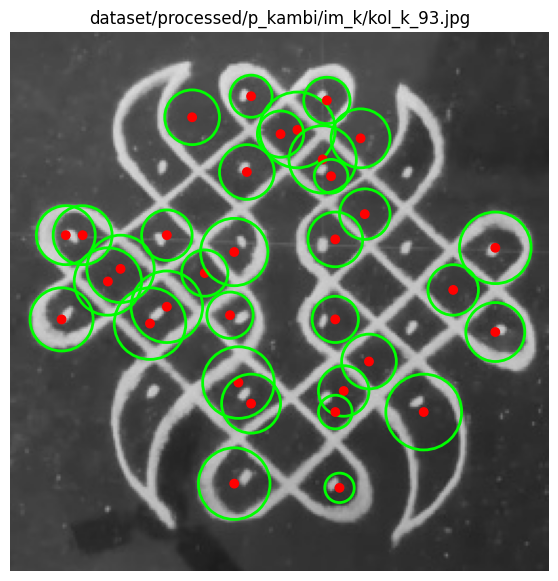

✔ added to validated_results


In [51]:
import cv2, numpy as np, matplotlib.pyplot as plt

image_list = [
    #"dataset/processed/p_kambi/im_k/kol_k_91.jpg",
    "dataset/processed/p_kambi/im_k/kol_k_93.jpg"
    #"dataset/processed/p_kambi/im_k/kol_k_84.jpg"
]

validated_results = []   # collect only the images you approve

for img_path in image_list:
    img  = cv2.imread(img_path)
    if img is None:
        print(f"❌ Cannot read {img_path}")
        continue

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(4,4))
    proc  = cv2.medianBlur( cv2.GaussianBlur( clahe.apply(gray), (5,5), 0), 5 )

    circles = cv2.HoughCircles(
        proc, cv2.HOUGH_GRADIENT,
        dp=1, minDist=8,
        param1=100, param2=19,
        minRadius=1, maxRadius=19
    )

    # --- show result ---
    plt.figure(figsize=(7,7))
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    if circles is not None:
        for (x, y, r) in np.uint16(np.around(circles))[0]:
            plt.gca().add_patch(plt.Circle((x, y), r, color='lime', fill=False, lw=2))
            plt.gca().add_patch(plt.Circle((x, y), 2, color='red'))
    plt.axis("off")
    plt.title(img_path)
    plt.show()

    # --- your manual choice ---
    keep = input("Save this detection? (y/n) ").strip().lower()
    if keep == "y" and circles is not None:
        validated_results.append((img_path, img, np.uint16(np.around(circles))))
        print("✔ added to validated_results")
    else:
        print("✖ skipped")


In [52]:
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import cv2

csv_dir     = Path("dataset/processed/p_kambi/csv_k")
overlay_dir = Path("dataset/processed/p_kambi/ov_im_k")
csv_dir.mkdir(parents=True, exist_ok=True)
overlay_dir.mkdir(parents=True, exist_ok=True)

for img_path, img_obj, circ in validated_results:
    base = Path(img_path).stem

    # CSV
    np.savetxt(csv_dir / f"{base}_dots.csv",
               circ[0], delimiter=",", fmt="%d",
               header="x,y,r", comments="")
    print(f"CSV saved: {base}_dots.csv")

    # Overlay
    img_rgb = cv2.cvtColor(img_obj, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(8,8))
    plt.imshow(img_rgb)
    ax = plt.gca()
    for (x, y, r) in circ[0]:
        ax.add_patch(plt.Circle((x, y), r, color='lime', fill=False, lw=2))
        ax.add_patch(plt.Circle((x, y), 2, color='red'))
    plt.axis("off")
    plt.savefig(overlay_dir / f"{base}_overlay.jpg",
                bbox_inches="tight", pad_inches=0)
    plt.close()
    print(f"Overlay saved: {base}_overlay.jpg")


CSV saved: kol_k_93_dots.csv
Overlay saved: kol_k_93_overlay.jpg
